# EKSPLORASI DATA PESANAN TOKO SHOPEE DEPOT BU HAJI TUTI BULAN JUNI 2022

*DATA DI BAWAH INI MERUPAKAN DATA REAL DENGAN BEBERAPA ADA YANG TIDAK DITAMPILKAN DIKARENAKAN BERSIFAT PRIBADI SEPERTI USERNAME PEMBELI*

# --- Bagian Inisialisasi Data Pesanan yang disimpan pada Google Drive dan Inisialisasi Pustaka yang akan digunakan seperti Pandas, Matplotlib, Numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv('drive/My Drive/order_062022.csv',sep=';')

Mounted at /content/drive


# --- Membuat Variabel Data Frame yang sudah difilter berdasarkan Status Pesanan Selesai dan No Pesanan
Data inilah yang akan diolah dibagian selanjutnya

In [3]:
pesanan_selesai = data[(data["Status Pesanan"]=="Selesai")]
hapus_duplikat = pesanan_selesai.drop_duplicates(['No. Pesanan'])

# 1. Menampilkan Jumlah Pesanan Berdasarkan Kota / Kabupaten
Dari Grafik Terlihat Kota / Kabupaten dengan Pesanan Terbanyak Berasal dari Kota Jakarta Timur, lalu diikuti Kota Bekasi 

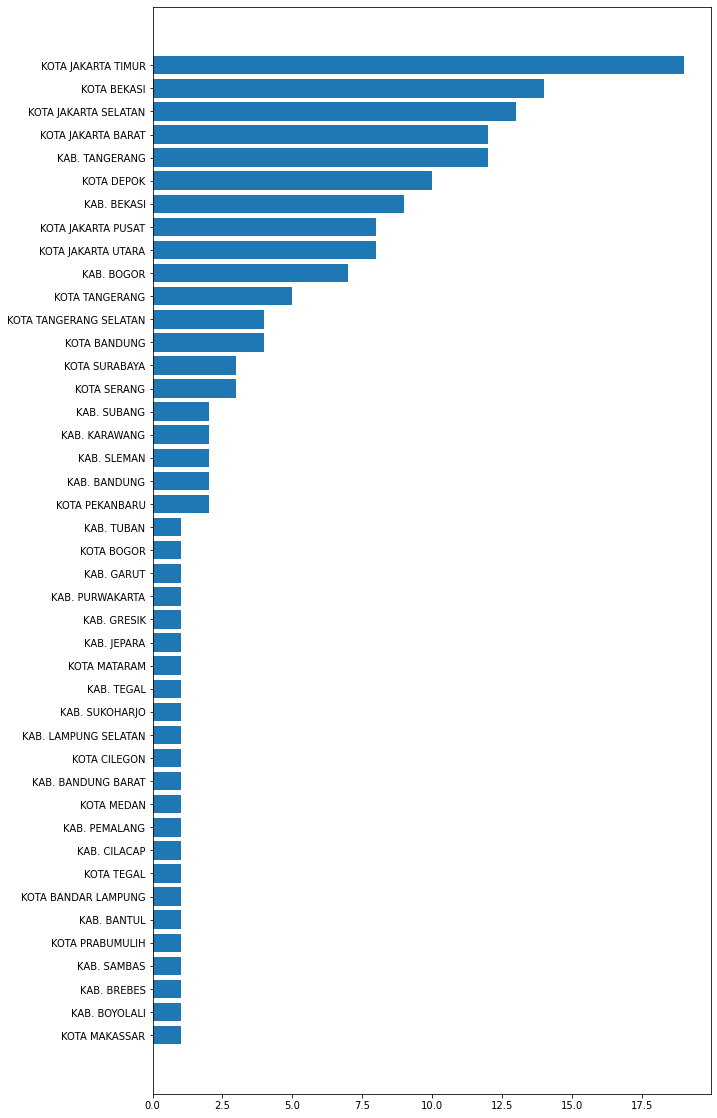

In [ ]:
kabupaten=hapus_duplikat['Kota/Kabupaten'].value_counts().sort_values()
fig = plt.figure(figsize=(10, 20))
plt.barh(kabupaten.keys(),kabupaten.values)
plt.show() 

# 2. Menampilkan jumlah pesanan dengan status selesai dalam satuan jam dalam jangka satu bulan
Kesimpulan yang dapat diambil yaitu jam 12 Merupakan jam dengan pesanan terbanyak lalu diikuti jam 13
Dari kesimpulan di atas penjual dapat memberikan waktu prioritas pada jam tersebut setiap hari untuk memproses pesanan yang masuk

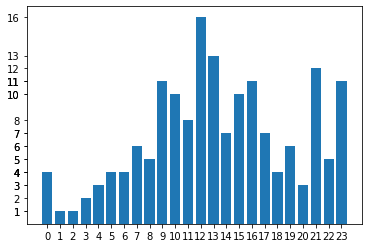

In [36]:
hapus_duplikat = hapus_duplikat.assign(Timestamp = lambda x: pd.to_datetime(hapus_duplikat['Waktu Pesanan Dibuat'],format='%Y-%m-%d %H:%M'))
hapus_duplikat = hapus_duplikat.assign(Jam = lambda y: pd.to_datetime(hapus_duplikat['Timestamp']).dt.hour)
jam_order = hapus_duplikat['Jam'].value_counts()
plt.bar(jam_order.keys(),jam_order)
plt.xticks(jam_order.keys())
plt.yticks(jam_order)
plt.show()

# 3. Menampilkan jumlah pesanan dengan status selesai dalam satuan hari dalam jangka satu bulan

Dari Grafik terlihat pada tanggal 6/6/2022 terjadi puncak (peak) pesanan yaitu sebanyak 20 sekian, dapat dikonfiirmasi tanggal tersebut merupakan tanggal kembar 6/6 saat Promo Shopee Gratis Ongkir. Juga dalam Grafik terdapat garis trend rata-rata, bahwa rata-rata pesanan setiap harinya sebanyak 5 sekian pesanan.

Dapat diambil kesimpulan jika saat promo tanggal kembar penjual perlu menyiapkan stok 4 kali dari jumlah rata-rata pesanan per hari nya.

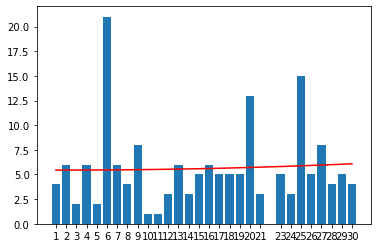

In [37]:
hapus_duplikat = hapus_duplikat.assign(Days = lambda y: pd.to_datetime(hapus_duplikat['Timestamp']).dt.day)
hari_order = hapus_duplikat['Days'].value_counts().sort_index()
x = np.array(hari_order.keys())
y = np.array(hari_order.values)

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

plt.bar(x, y)
plt.xticks(x)
plt.plot(x, p(x),color="red")

# 4. Menampilkan jumlah pesanan berdasarkan jasa kirim 

Terlihat jasa kirim reguler utama yang digunakan penjual yaitu Shopee Express Standar

<BarContainer object of 4 artists>

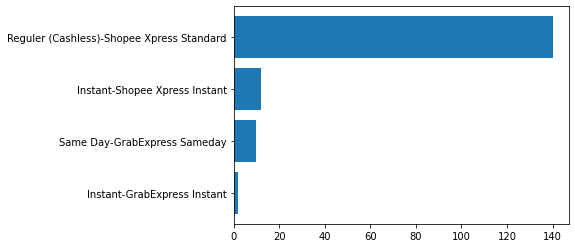

In [15]:
x=hapus_duplikat['Opsi Pengiriman'].value_counts().sort_values().keys()
y=hapus_duplikat['Opsi Pengiriman'].value_counts().sort_values().values
plt.barh(x,y)

# 5. Menampilkan Pembeli dengan 5 terbanyak dalam satu bulan
Dari data tersebut, penjual dapat memberikan promo menarik untuk pembeli tersebut untuk memberikan apresiasi atas pembeliannya dengan tujuan agar pembeli dapat melakukan pemesanan kembali (repeat order) sehingga meningkatkan penjualan.

*Dalam Grafik sengaja untuk tidak ditampilkan Username dari pembeli karena bersifat pribadi*

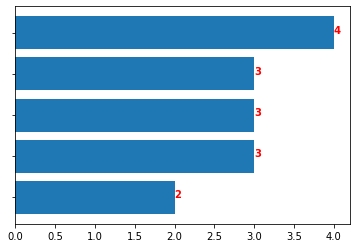

In [34]:
x=hapus_duplikat['Username (Pembeli)'].value_counts().head().sort_values().keys()
y=hapus_duplikat['Username (Pembeli)'].value_counts().head().sort_values().values
fig, ax = plt.subplots()
plt.barh(x,y)
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='red',fontweight="bold")
ax.set_yticklabels([])
plt.show()

# 6. Menampilkan jumlah pesanan berdasarkan variasi

Terlihat pesanan dengan variasi 1/2 kg dengan jumlah paling banyak, dengan begitu penjual dapat menyiapkan stok produk Biji Ketepang Bu Haji Tuti variasi 1/2 kg lebih banyak dari variasi yang lain.

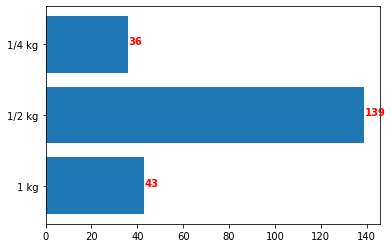

In [98]:
variasi=hapus_duplikat.groupby(['Nama Variasi'])['Jumlah'].sum()
fig, ax = plt.subplots()
bars = ax.barh(x.keys(),x.values)
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='red',fontweight="bold")
plt.show()


# 7. Menampilkan omset dalam 1 bulan

Terlihat jumlah omset di bulan Juni 2022, total omset (termasuk biaya jasa kirim) Depot Bu Haji Tuti sejumlah **Rp. 9.299.599,-**

In [100]:
hapus_duplikat['Total Pembayaran'].sum()*1000

9299599.0